In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive')
!touch "/content/gdrive/MyDrive/files"

Mounted at /content/gdrive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

Loading Data

In [7]:
def load_data():
  train_dataset = h5py.File('/content/gdrive/MyDrive/DL/train_catvnoncat.h5','r')
  train_set_x = np.array(train_dataset["train_set_x"][:])
  train_set_y = np.array(train_dataset['train_set_y'][:])

  test_dataset = h5py.File('/content/gdrive/MyDrive/DL/test_catvnoncat.h5','r')
  test_set_x= np.array(test_dataset["test_set_x"][:])
  test_set_y = np.array(test_dataset["test_set_y"][:])

  classes = np.array(test_dataset["list_classes"][:])

  train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
  test_set_y = test_set_y.reshape((1,test_set_y.shape[0]))

  return train_set_x, train_set_y, test_set_x,test_set_y ,classes

In [8]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_data()

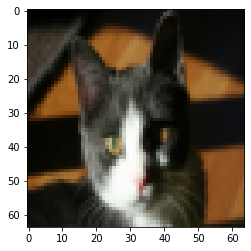

[1]


In [9]:
index = 19
plt.imshow(train_set_x[index])
plt.show()
print(str(train_set_y[:, index])) 

Find the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [10]:
m_train = train_set_x.shape[0]
m_test =  test_set_x.shape[0]
num_px = test_set_x.shape[1]

In [11]:
print("The number of training examples:",m_train)
print("The number of testing examples:",m_test)
print("Hight/width for each image:",num_px)

The number of training examples: 209
The number of testing examples: 50
Hight/width for each image: 64


Reshape the training and test data sets 

so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px * num_px * 3, 1).

In [12]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

In [13]:
print("The shape before (Trainning set):",train_set_x.shape)
print("The shape after (Trainning set):",train_set_x_flatten.shape)

The shape before (Trainning set): (209, 64, 64, 3)
The shape after (Trainning set): (12288, 209)


Standrize the data

In [14]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

Sigmoid function 


In [15]:
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

In [ ]:
sigmoid(0)

0.5

In [16]:
def initialize(dim):
  w = np.zeros((dim,1))
  b = 0
  return w,b

In [ ]:
initialize(2)

(array([[0.],
        [0.]]), 0)

Forward and Backward propagation

In [17]:
def propagate(w,b,X,Y):
  m = X.shape[1]
  #Forward Propagation
  A = sigmoid(np.dot(w.T, X) + b)  
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

  #Backward Propagation
  dw = (1 / m) * np.dot(X, (A - Y).T)
  db = (1 / m) * np.sum(A - Y)

  cost = np.squeeze(cost)
  grads = {"dw": dw,"db": db}
  return grads, cost

In [18]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


The optimization function.

 The goal is to learn w and b by minimizing the cost function J.

In [19]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
  costs = []
  for i in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)
    
    dw = grads["dw"]
    db = grads["db"]

    w = w - learning_rate * dw  
    b = b - learning_rate * db

    if i % 100 == 0:
      costs.append(cost)

  params = {"w": w, "b": b}
  grads = {"dw": dw,"db": db}

  return params, grads, costs

In [21]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [22]:
def predict(w, b, X):
  m = X.shape[1]
  y = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)

  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    y[0, i] = 1 if A[0, i] > 0.5 else 0

  return y

The Model

In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
  w, b = initialize(X_train.shape[0])
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
  w = parameters["w"]
  b = parameters["b"]

  y_test = predict(w, b, X_test)
  y_train = predict(w, b, X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test - Y_test)) * 100))

  p = {"costs": costs,
       "Y_prediction_test": y_test, 
        "Y_prediction_train" : y_train, 
        "w" : w, 
         "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
  return p

In [25]:
p = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 50, learning_rate = 0.005)

train accuracy: 59.80861244019139 %
test accuracy: 80.0 %
